In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

In [3]:
using SciPy
using Statistics

In [11]:
function sigma(x)
    return @fastmath 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [12]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0;
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0;
k1= -0.17; k2 = -0.17;
k = 0.0

condition2 = SA[0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]

12-element SArray{Tuple{12}, Float64, 1, 12} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.0

In [13]:
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, k]


ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );

In [14]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

In [24]:
data2 = trajectory(ds_HR2, 300000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,   maxiters = 10000000))

6-dimensional Dataset{Float64} with 30000001 points
  0.01        0.01       0.01        0.01        0.01       0.01
  0.0469168   0.0198047  0.0108132   0.0469168   0.0198047  0.0108132
  0.0840261   0.0293387  0.0116448   0.0840261   0.0293387  0.0116448
  0.121421    0.0384662  0.0124949   0.121421    0.0384662  0.0124949
  0.159187    0.0470484  0.0133638   0.159187    0.0470484  0.0133638
  0.197404    0.054943   0.0142515   0.197404    0.054943   0.0142515
  0.23615     0.0620026  0.0151584   0.23615     0.0620026  0.0151584
  0.275497    0.068074   0.0160847   0.275497    0.068074   0.0160847
  0.315516    0.0729965  0.0170308   0.315516    0.0729965  0.0170308
  0.356276    0.0766012  0.017997    0.356276    0.0766012  0.017997
  0.397846    0.07871    0.0189836   0.397846    0.07871    0.0189836
  0.440291    0.0791341  0.0199912   0.440291    0.0791341  0.0199912
  0.483677    0.0776728  0.0210201   0.483677    0.0776728  0.0210201
  ⋮                                         

In [25]:

x_sum2 = data2[15000:end, 1] + data2[15000:end, 4]



index2 = signal.argrelmax( x_sum2 )[1]
spikes2 = [x_sum2[x] for x in index2]


Hs2 = Statistics.mean(spikes2) + 6 * Statistics.std(spikes2)

4.958419042931963

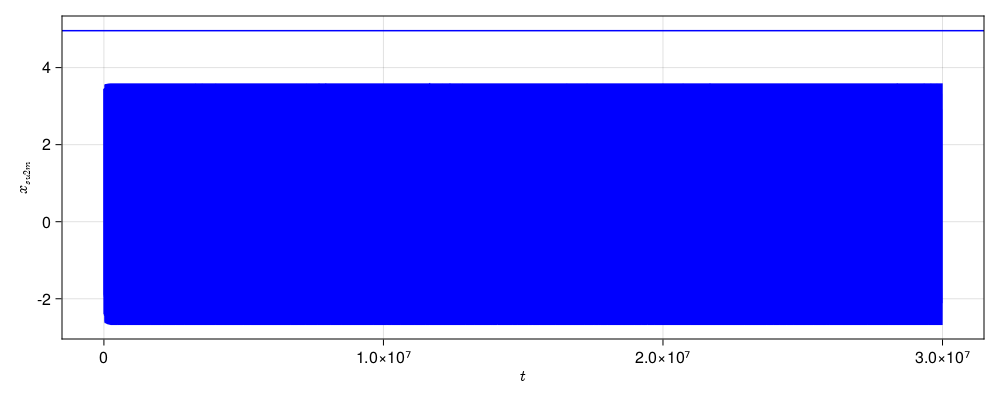

In [26]:
fig = Figure(resolution = (1000, 400))
ax = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{su2m}")
lines!((data2[15000:end, 1] + data2[15000:end, 4]), lw = 0.5, color = "blue")
hlines!(Hs2, lw = 2, color = "blue")
fig

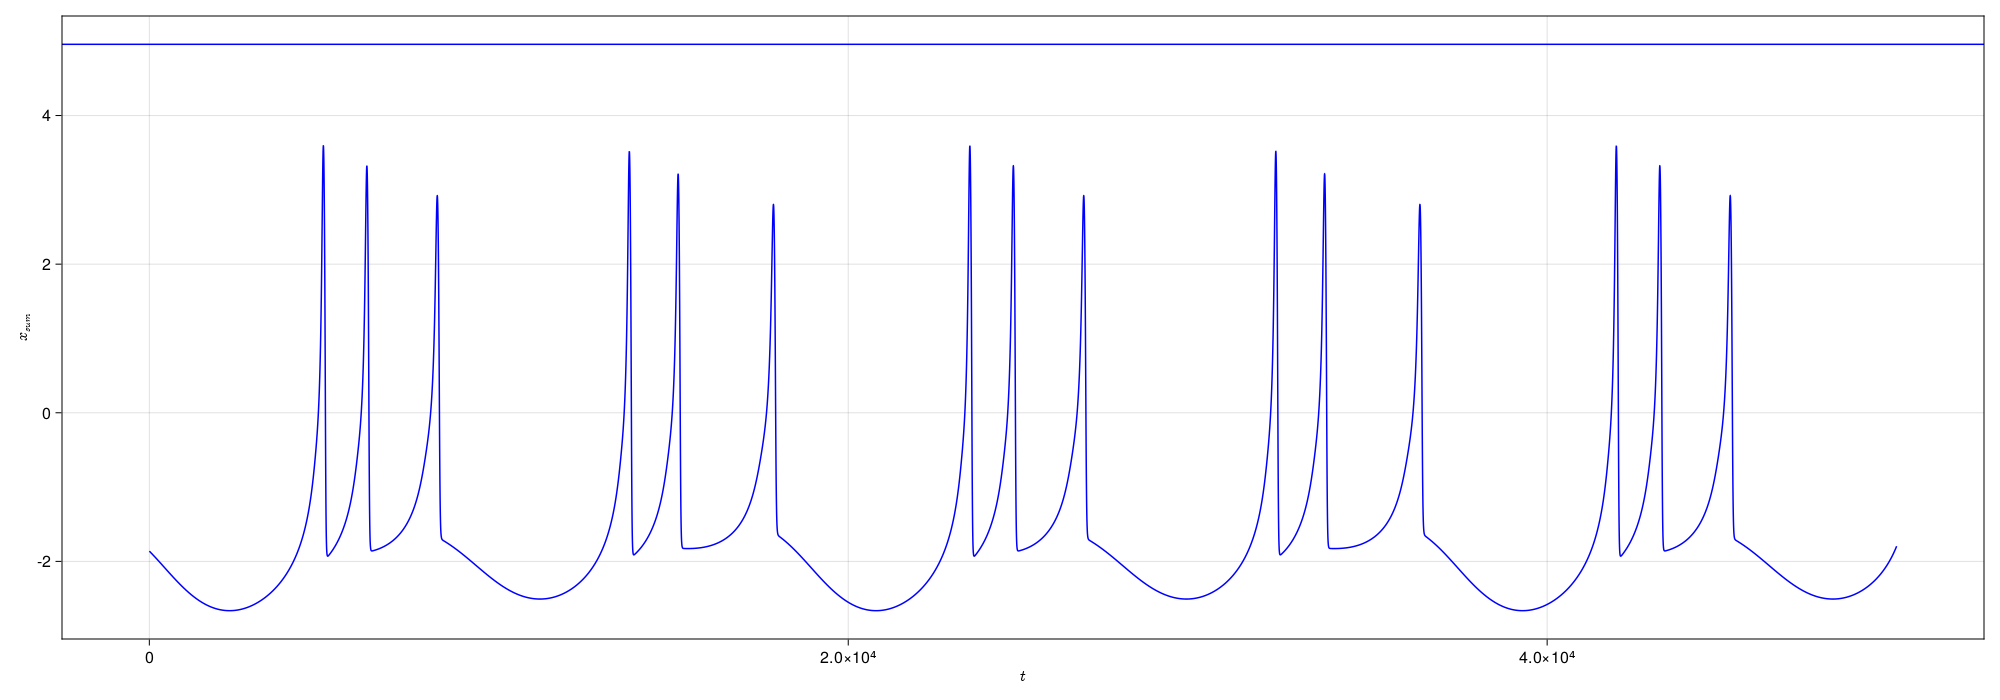

In [27]:
fig = Figure(resolution = (2000, 700))
ax = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{sum}")

lines!((data2[650000:700000, 1] + data2[650000:700000, 4]), lw = 0.4, color = "blue")


hlines!(Hs2, lw = 2, color = "blue")
fig

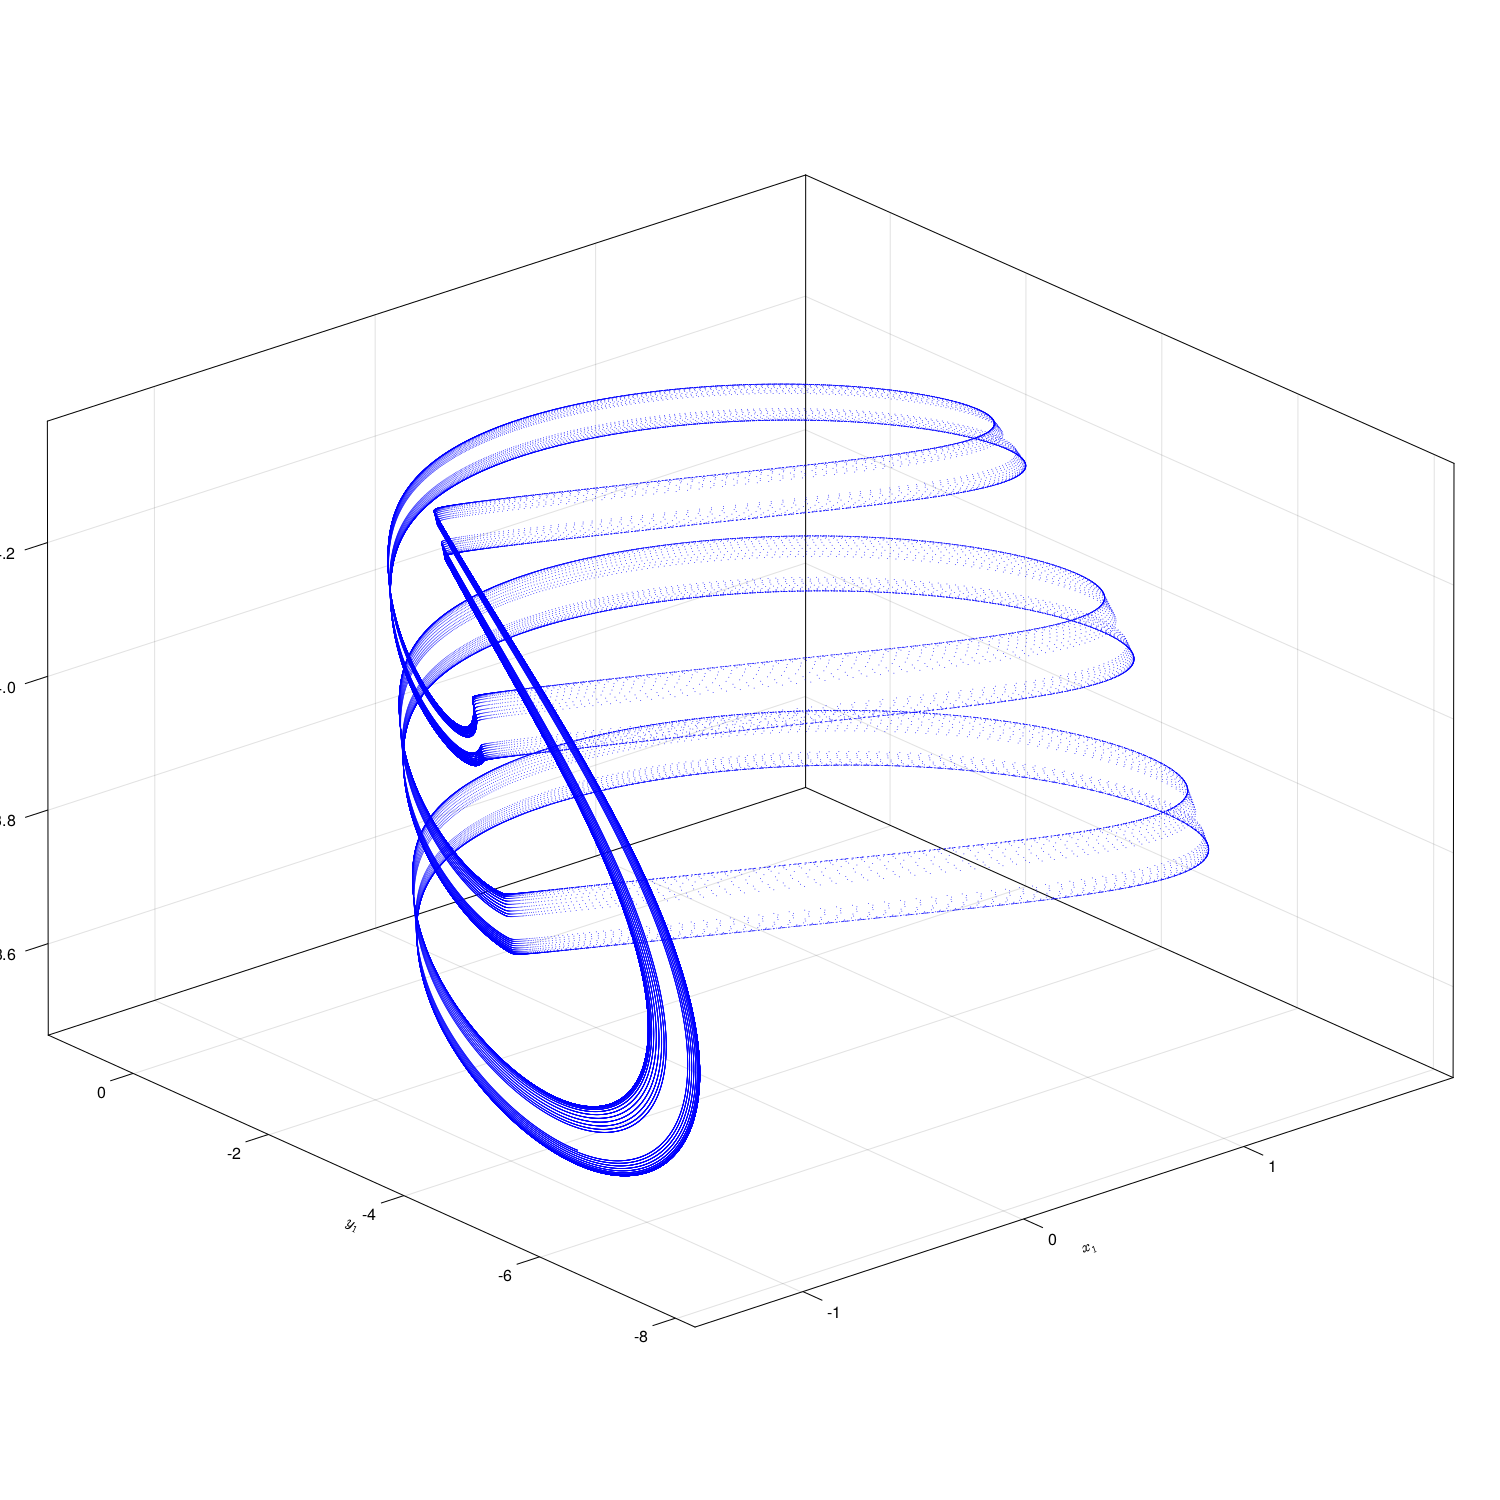

In [28]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1")

scatter!(ax, data2[100000:550000, 1], data2[100000:550000, 2], data2[100000:550000, 3], markersize = 0.9, color = "blue")

fig

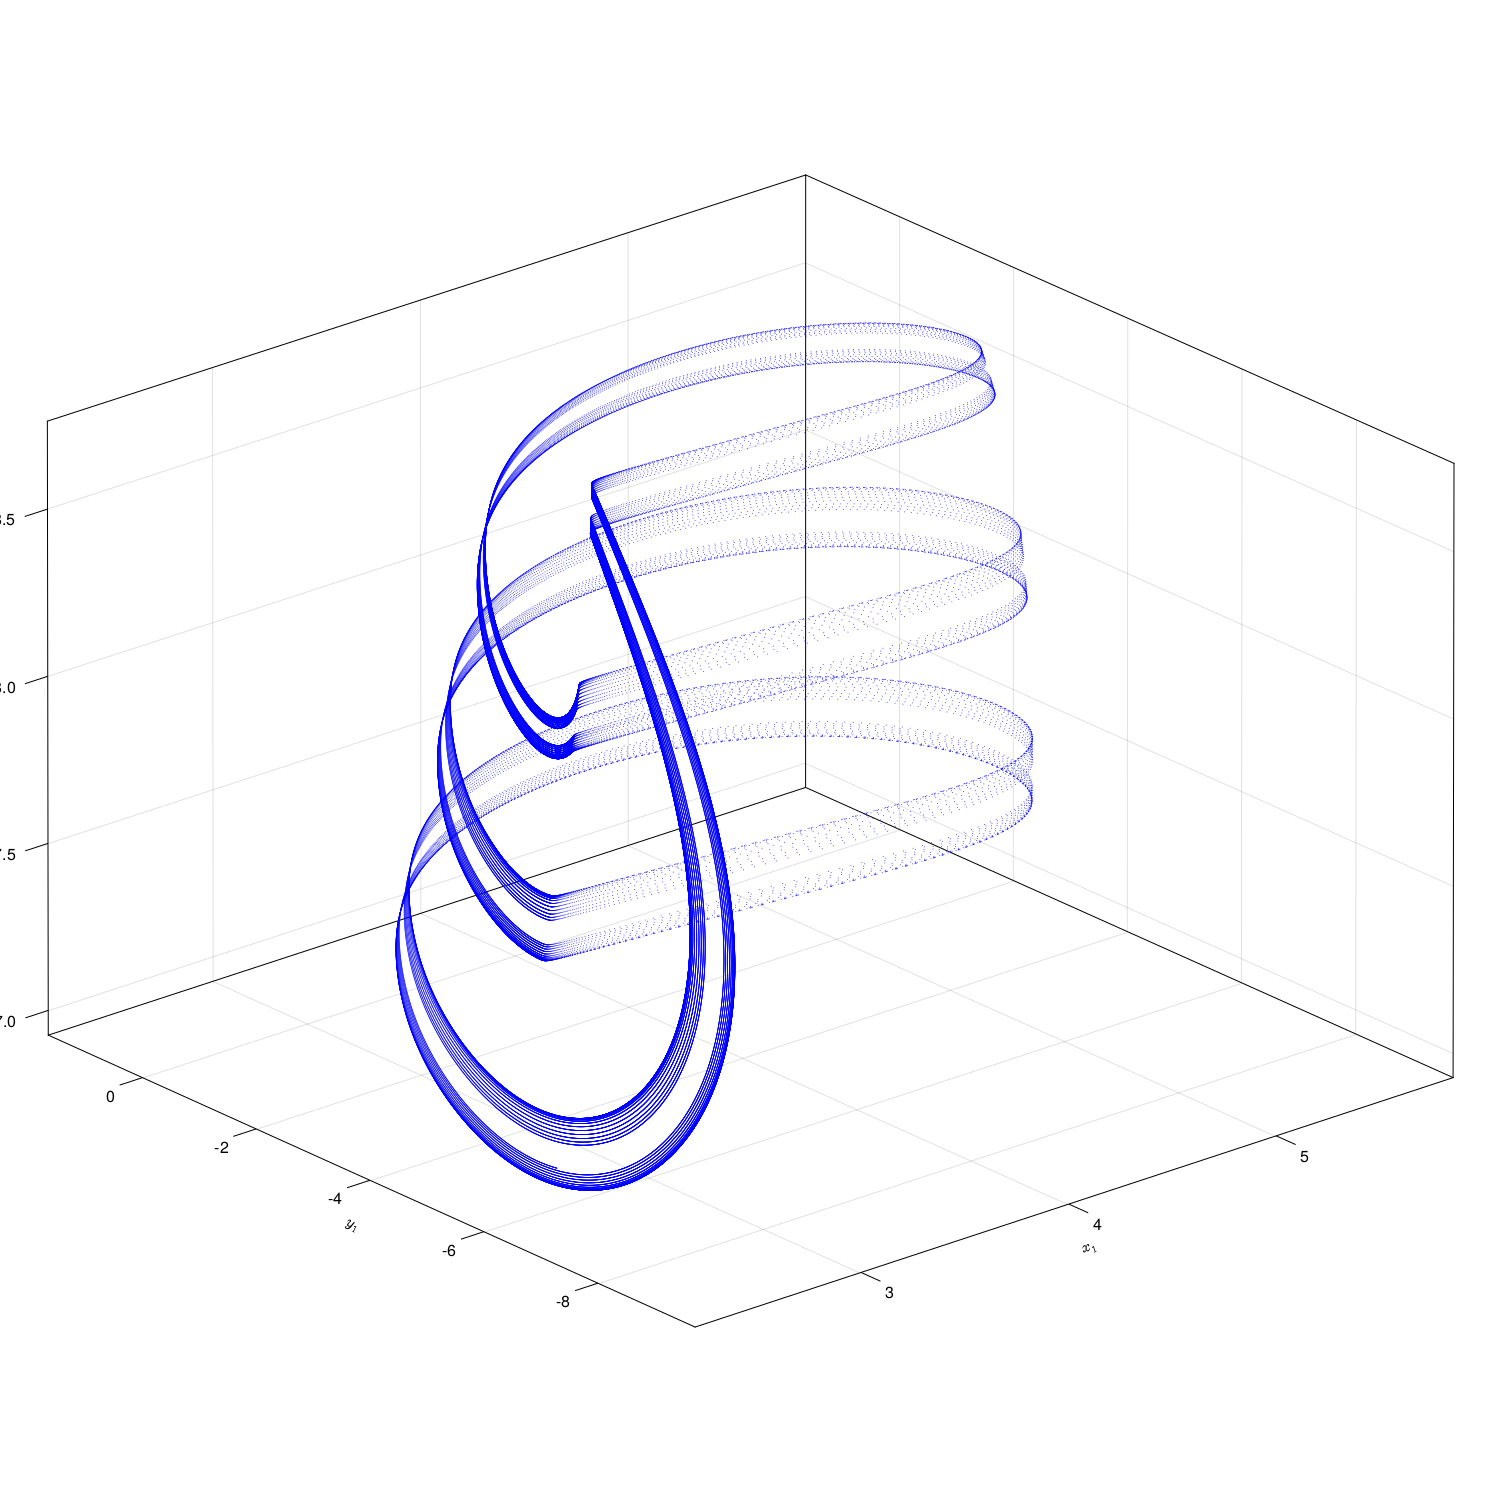

In [29]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1")

scatter!(ax, data2[100000:350000, 1] + data2[100000:350000, 3],
             data2[100000:350000, 2] + data2[100000:350000, 4],
             data2[100000:350000, 3] + data2[100000:350000, 6], markersize = 0.9, color = "blue")

fig

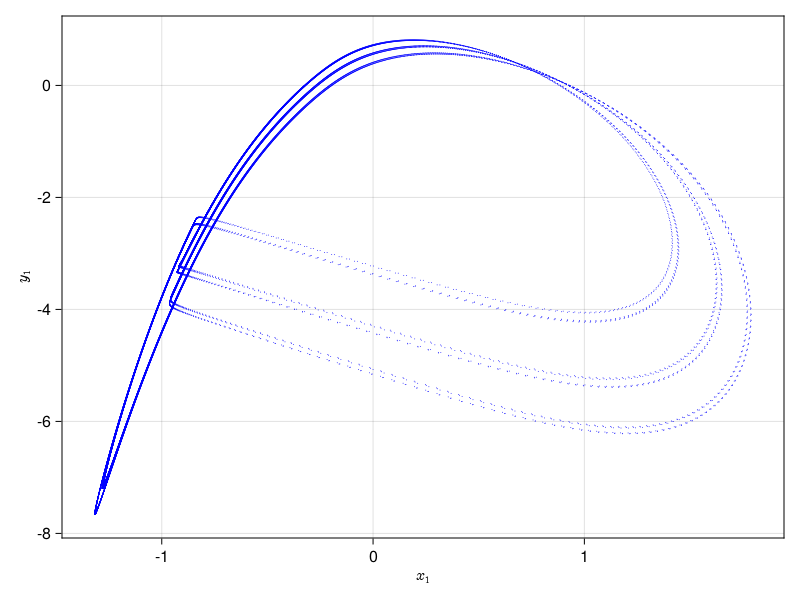

In [30]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1")

scatter!(ax, data2[100000:150000, 1], data2[100000:150000, 2], markersize = 0.9, color = "blue")
fig

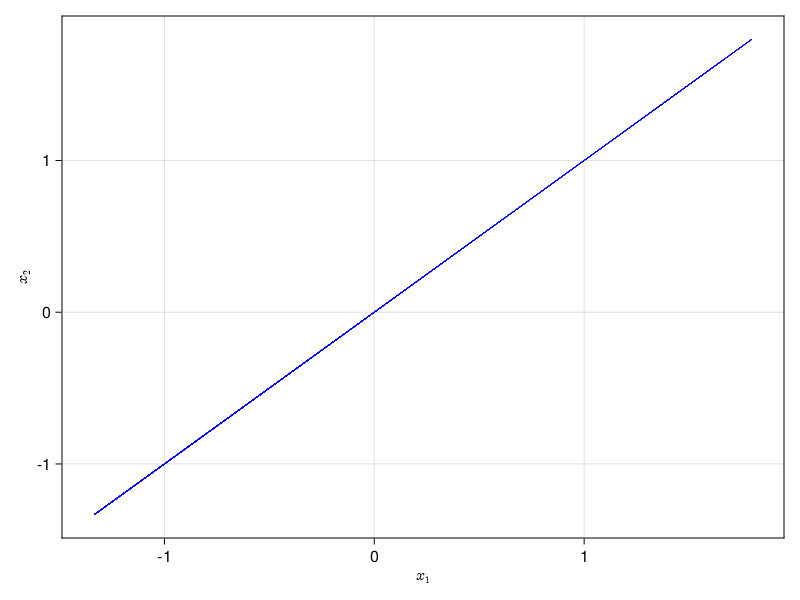

In [31]:
fig = Figure()

ax = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2")

scatter!(ax, data2[15000:500000, 1], data2[15000:500000, 4], markersize = 0.5, color = "blue")

fig

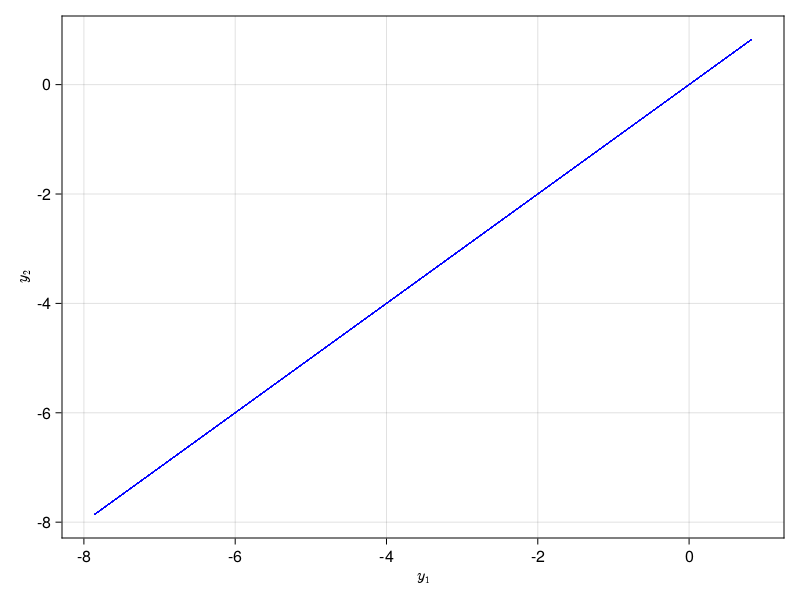

In [32]:
fig = Figure()

ax = Axis(fig[1,1]; xlabel = L"y_1", ylabel = L"y_2")

scatter!(ax, data2[15000:500000, 2], data2[15000:500000, 5], markersize = 0.5, color = "blue")
fig

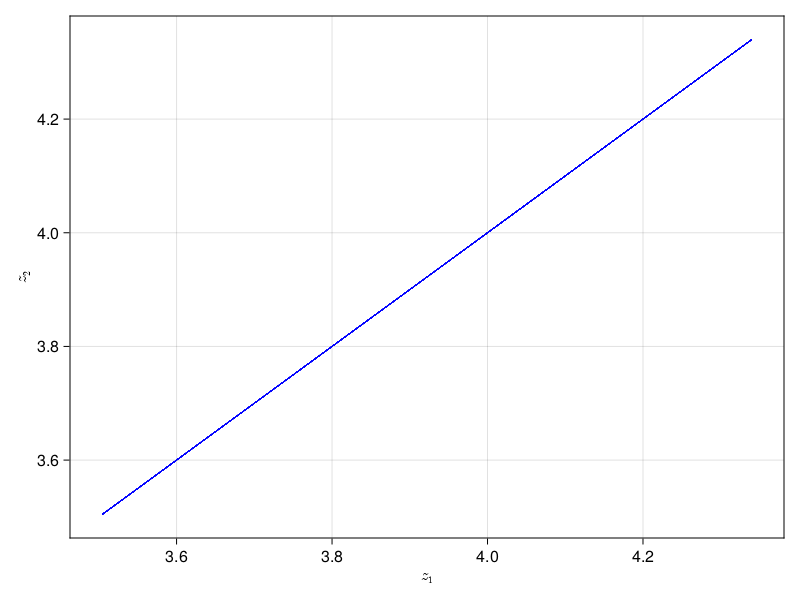

In [33]:
fig = Figure()

ax = Axis(fig[1,1]; xlabel = L"z_1", ylabel = L"z_2")

scatter!(ax, data2[15000:500000, 3], data2[15000:500000, 6], markersize = 0.5, color = "blue")
fig

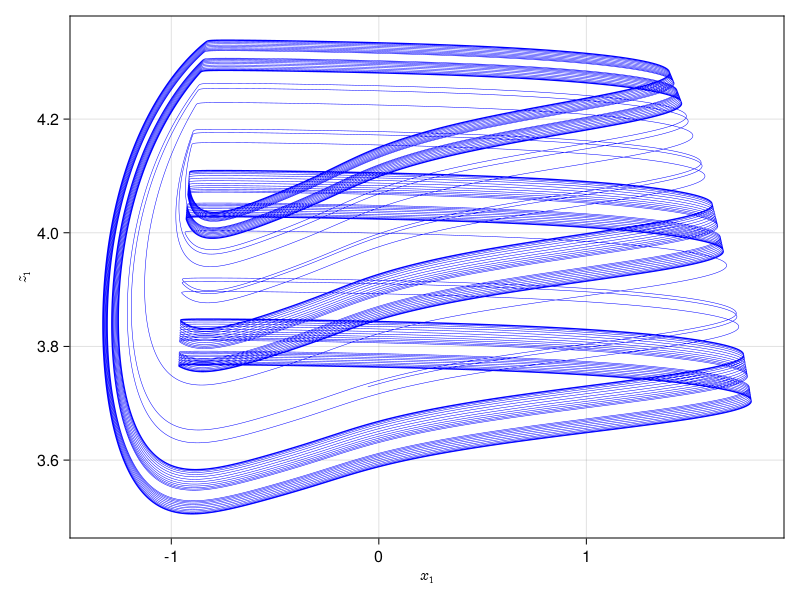

In [34]:
fig = Figure()

ax = Axis(fig[1,1]; xlabel = L"x_1", ylabel = L"z_1")

lines!(ax, data2[15000:500000, 1], data2[15000:500000, 3], linewidth = 0.5, color = "blue")
fig

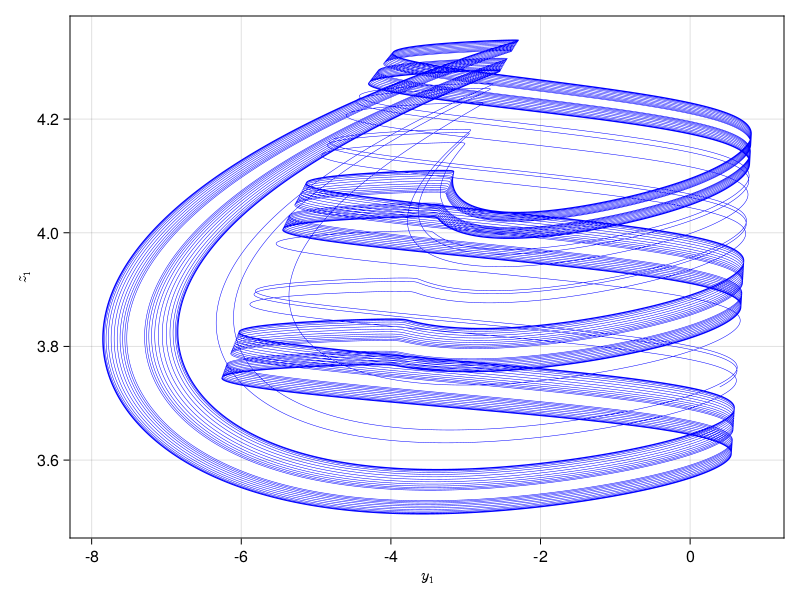

In [35]:
fig = Figure()

ax = Axis(fig[1,1]; xlabel = L"y_1", ylabel = L"z_1")

lines!(ax, data2[15000:500000, 2], data2[15000:500000, 3], linewidth = 0.5, color = "blue")
fig

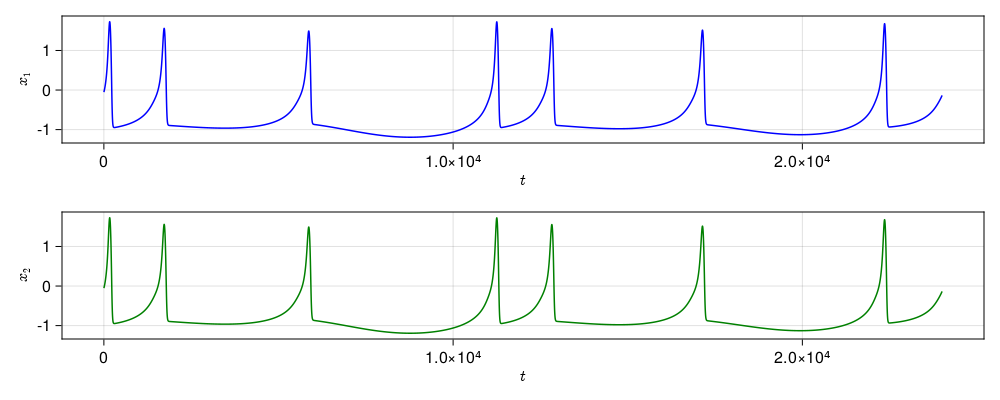

In [36]:
fig = Figure(resolution = (1000, 400))

ax1 = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{1}")
ax2 = Axis(fig[2,1]; xlabel = L"t", ylabel = L"x_{2}")

lines!(ax1, (data2[15000:39000, 1]), lw = 0.5, color = "blue")
lines!(ax2, (data2[15000:39000, 4]), lw = 0.5, color = "green")

fig

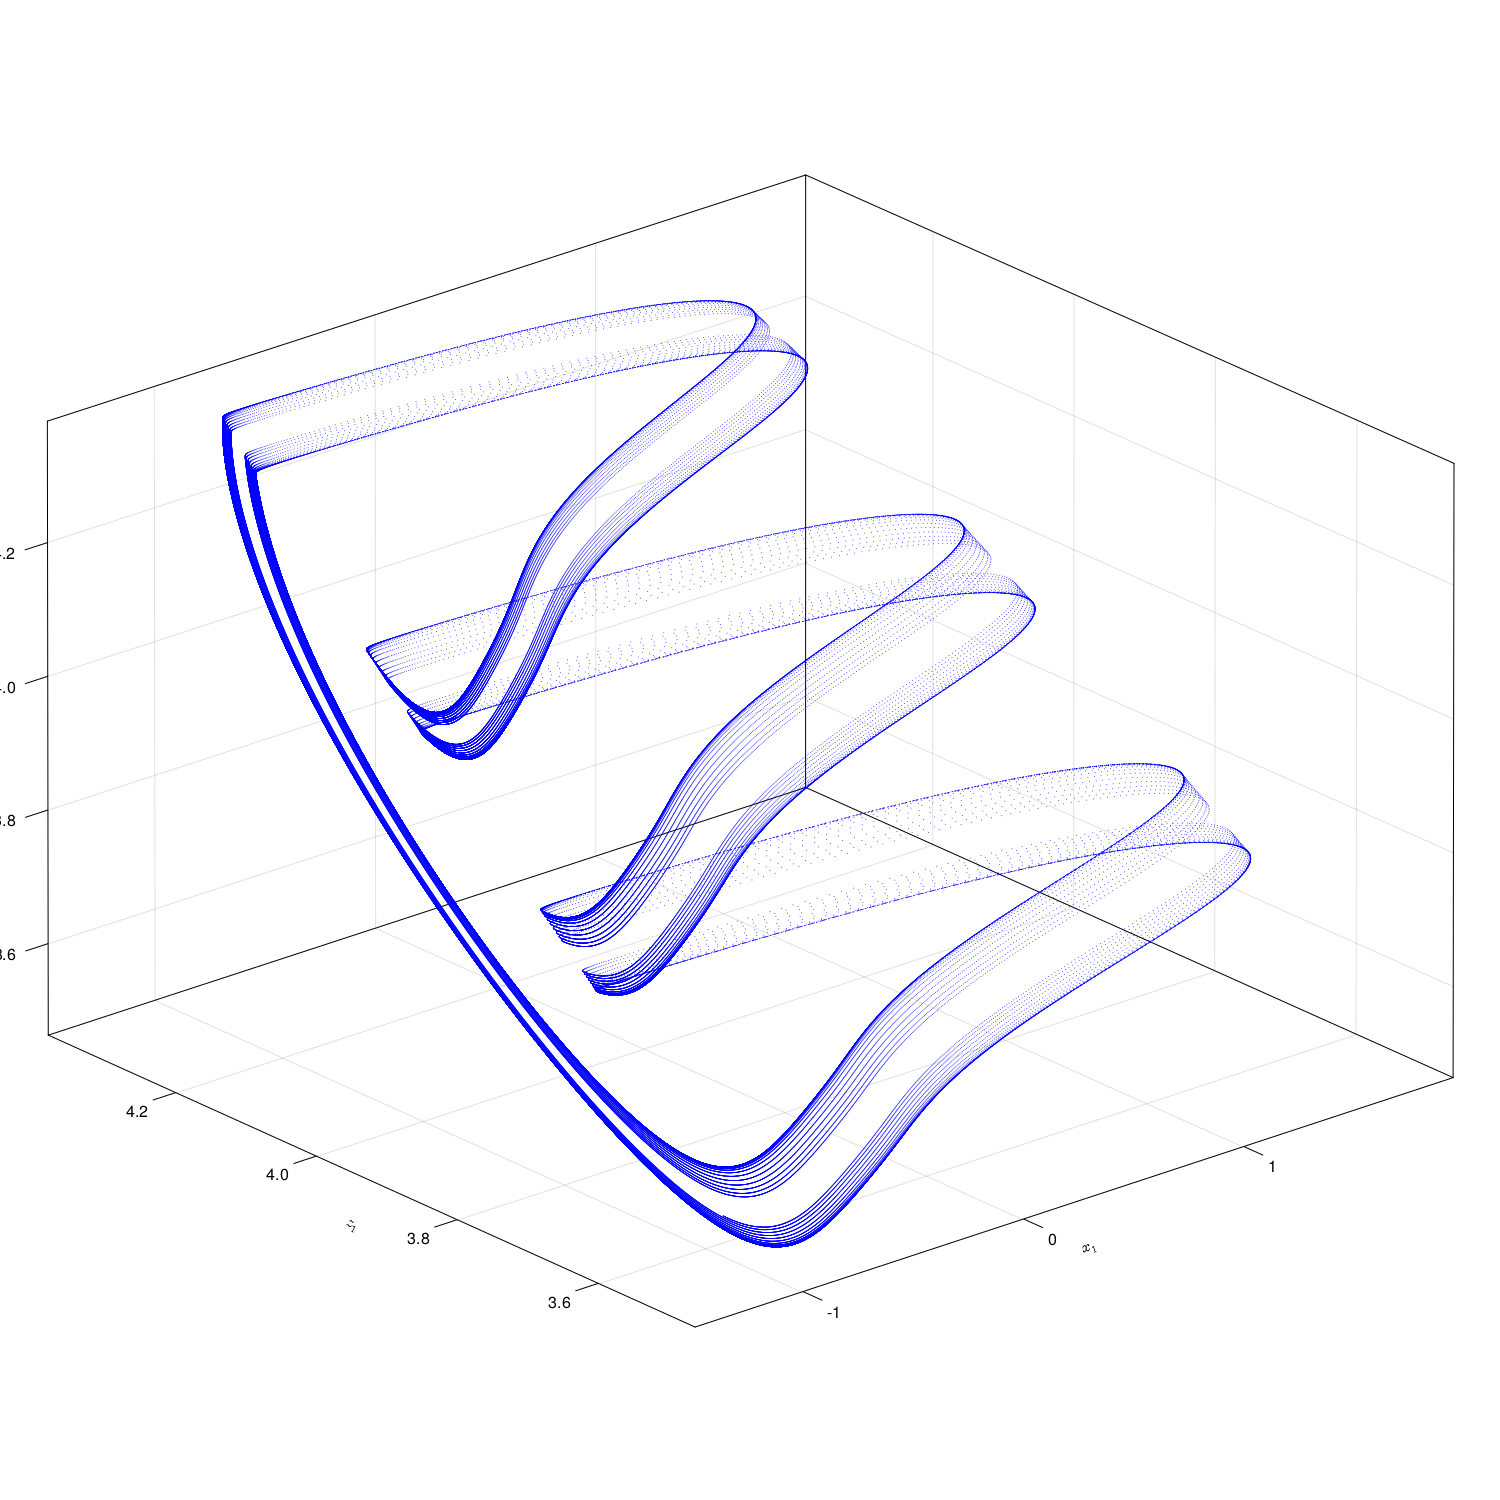

In [37]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"z_1", zlabel = L"z_2")

scatter!(ax, data2[100000:550000, 1], data2[100000:550000, 3], data2[100000:550000, 6], markersize = 0.9, color = "blue")

fig

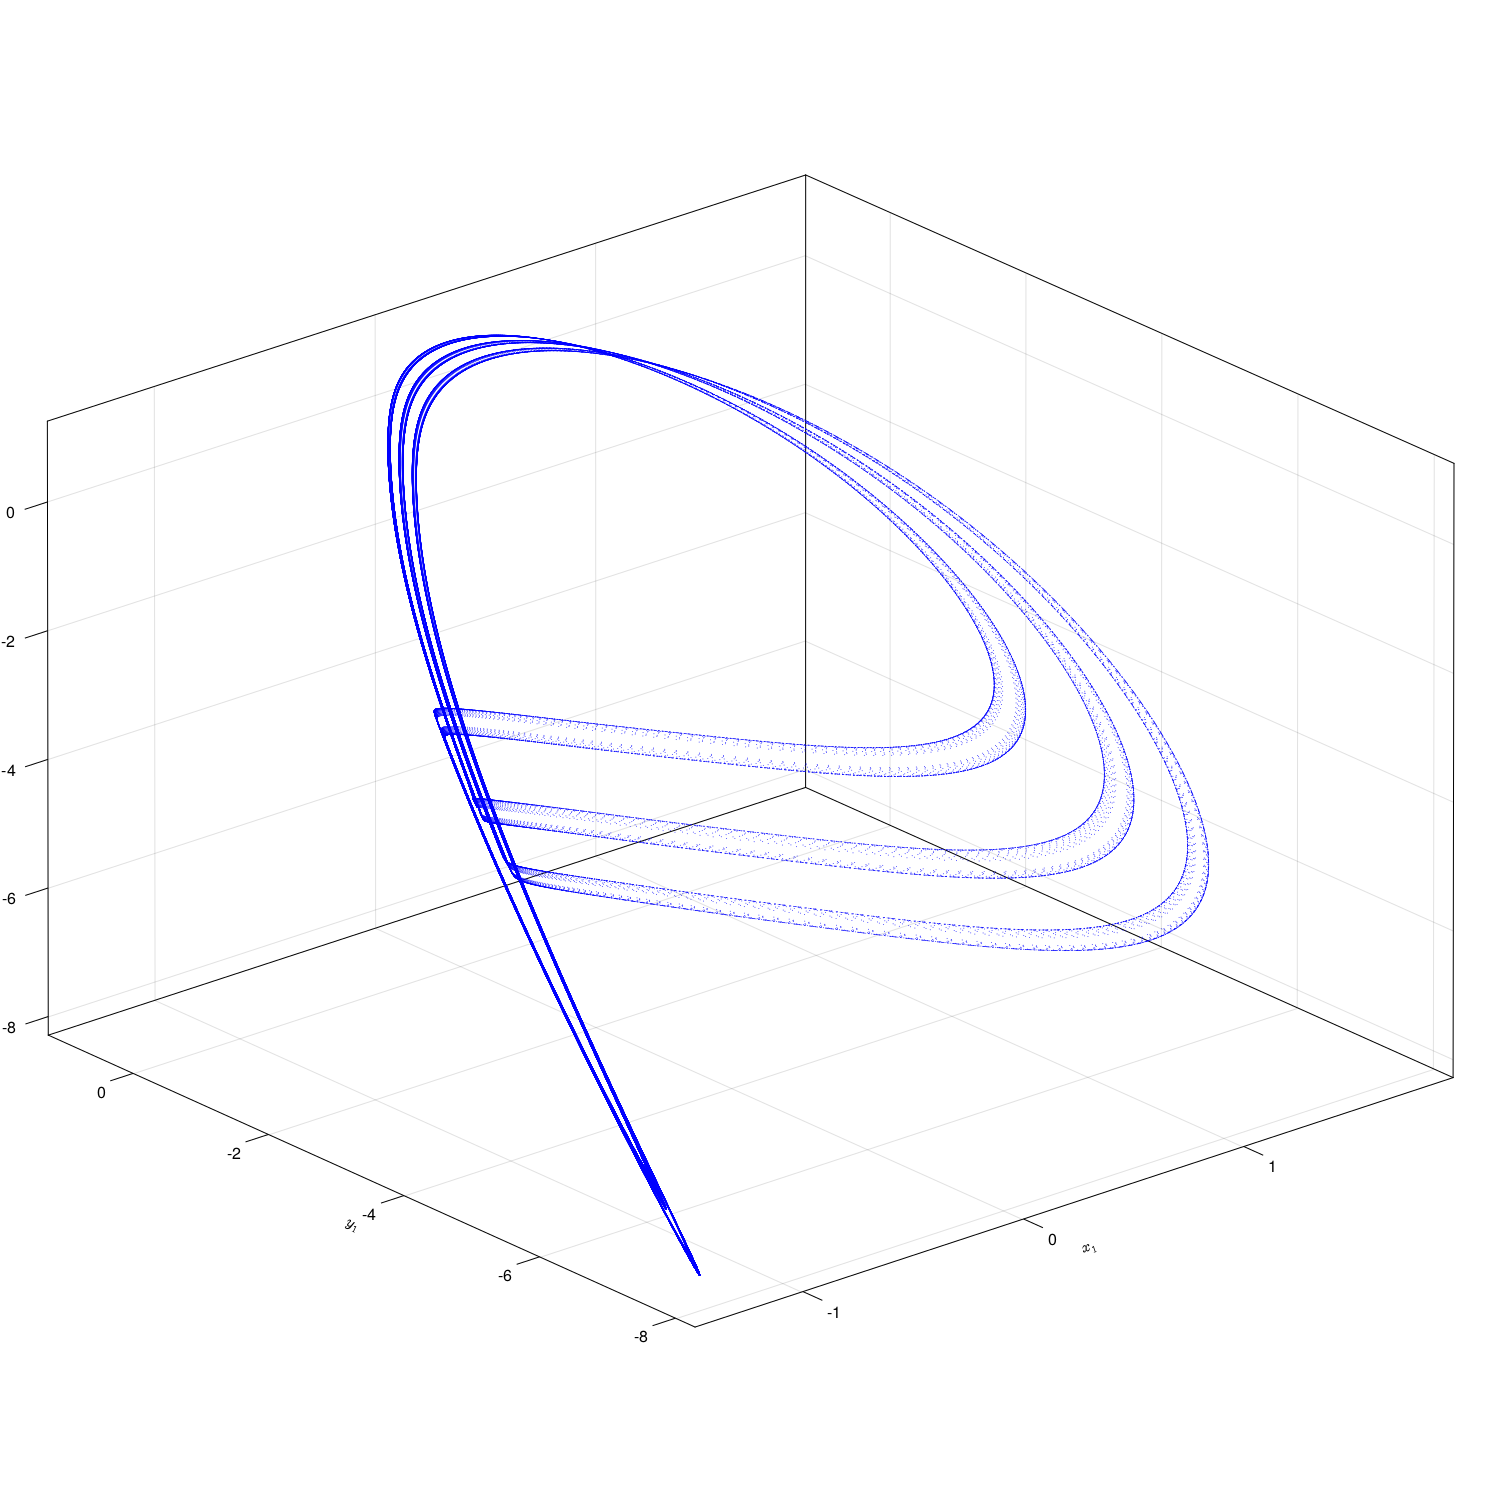

In [38]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"y_1", zlabel = L"y_2")

scatter!(ax, data2[100000:550000, 1], data2[100000:550000, 2], data2[100000:550000, 5], markersize = 0.9, color = "blue")

fig

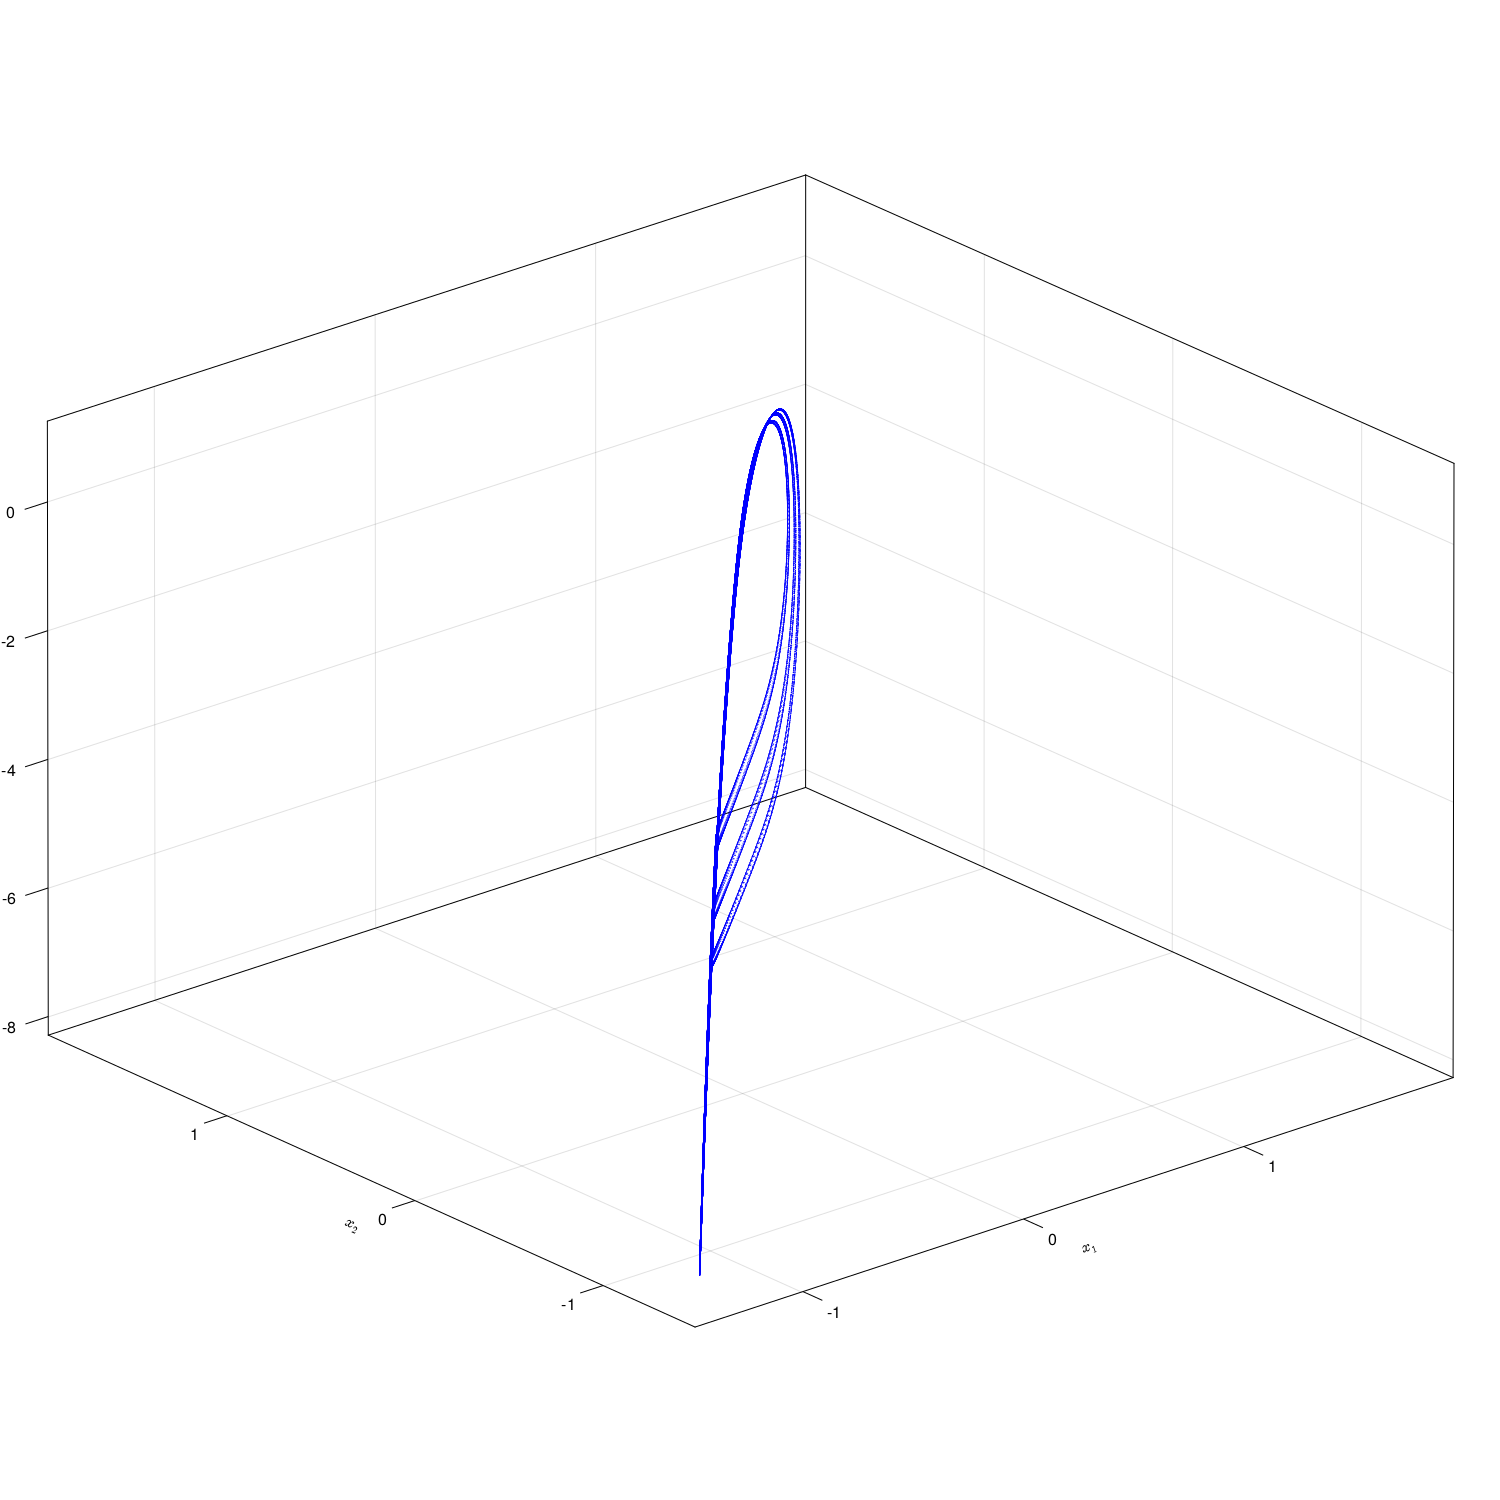

In [39]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2")

scatter!(ax, data2[100000:550000, 1], data2[100000:550000, 4], data2[100000:550000, 5], markersize = 0.9, color = "blue")

fig

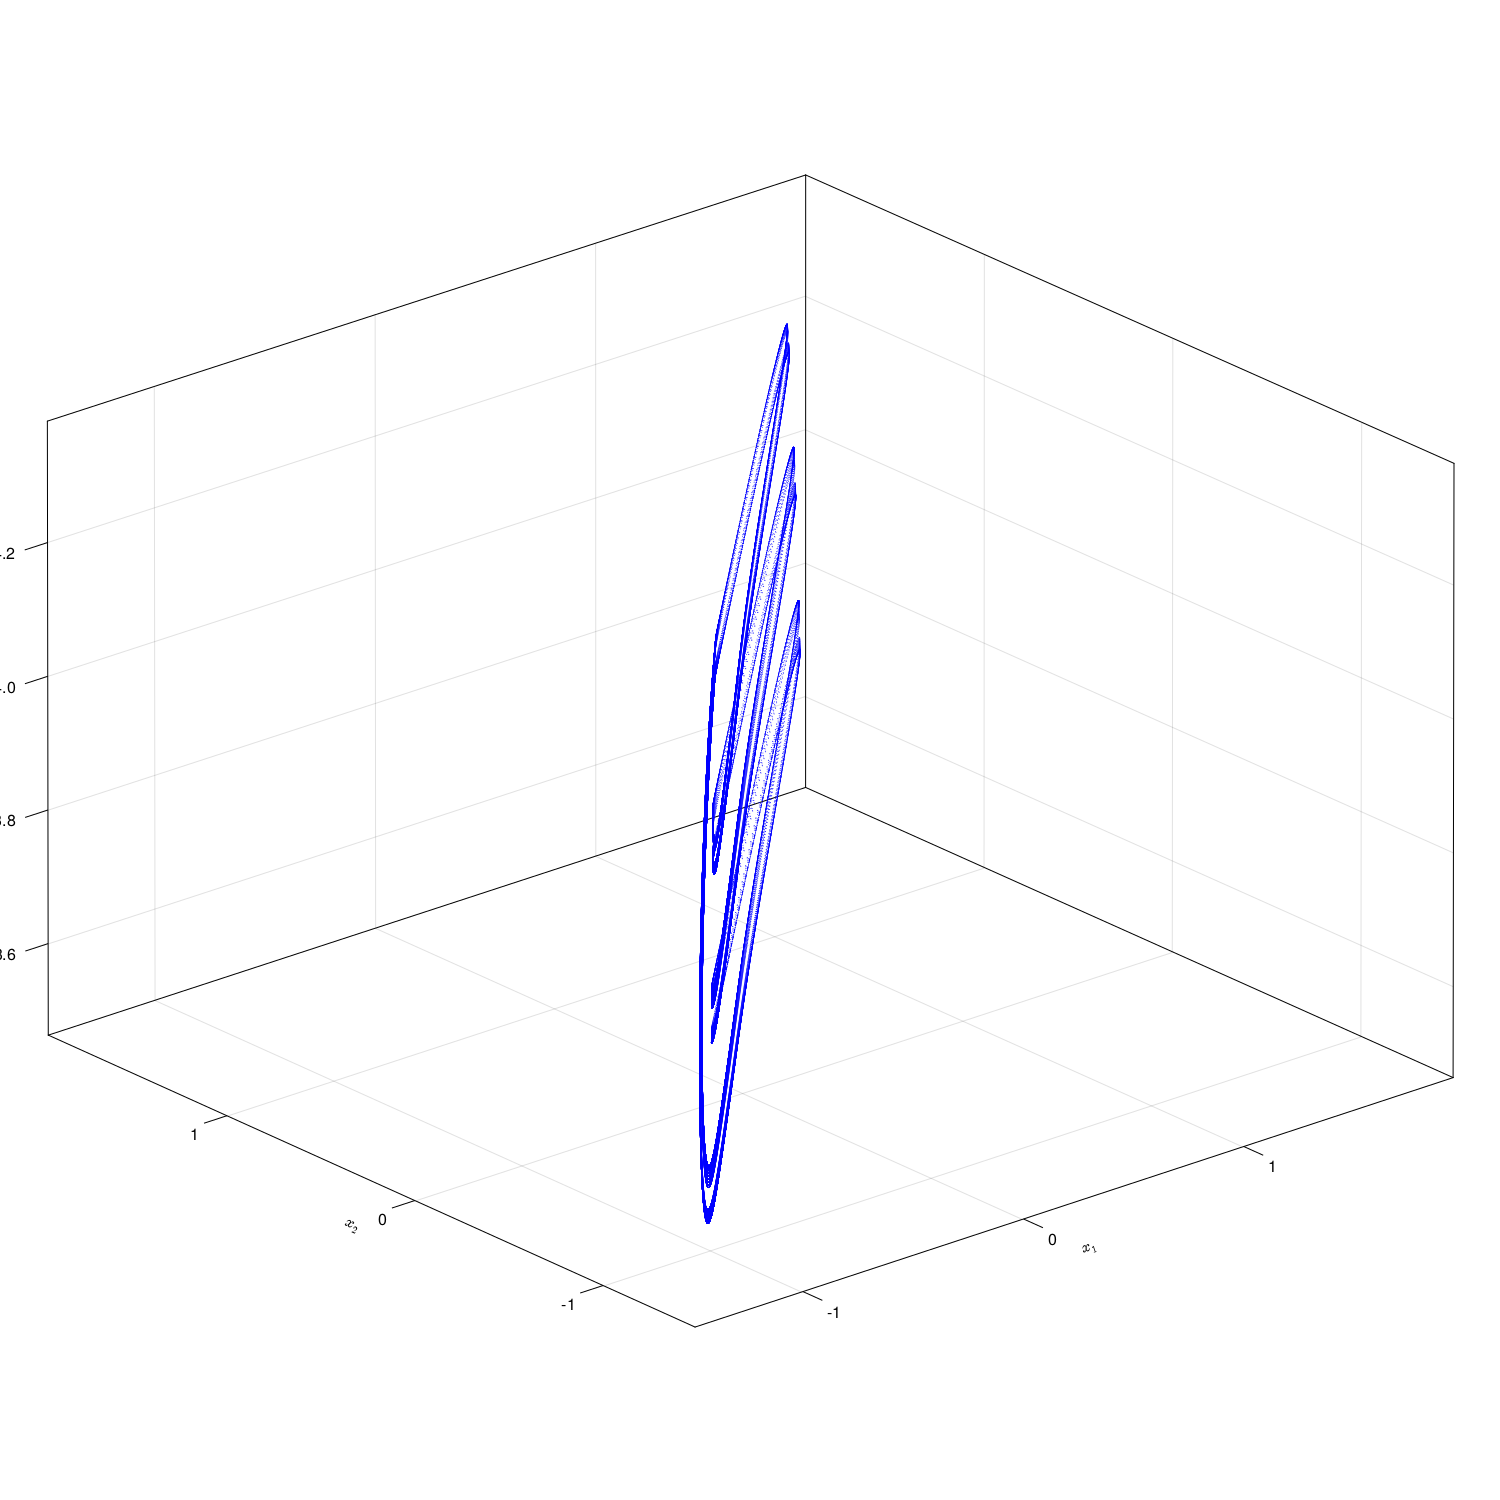

In [40]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z_2")

scatter!(ax, data2[100000:550000, 1], data2[100000:550000, 4], data2[100000:550000, 6], markersize = 0.9, color = "blue")

fig

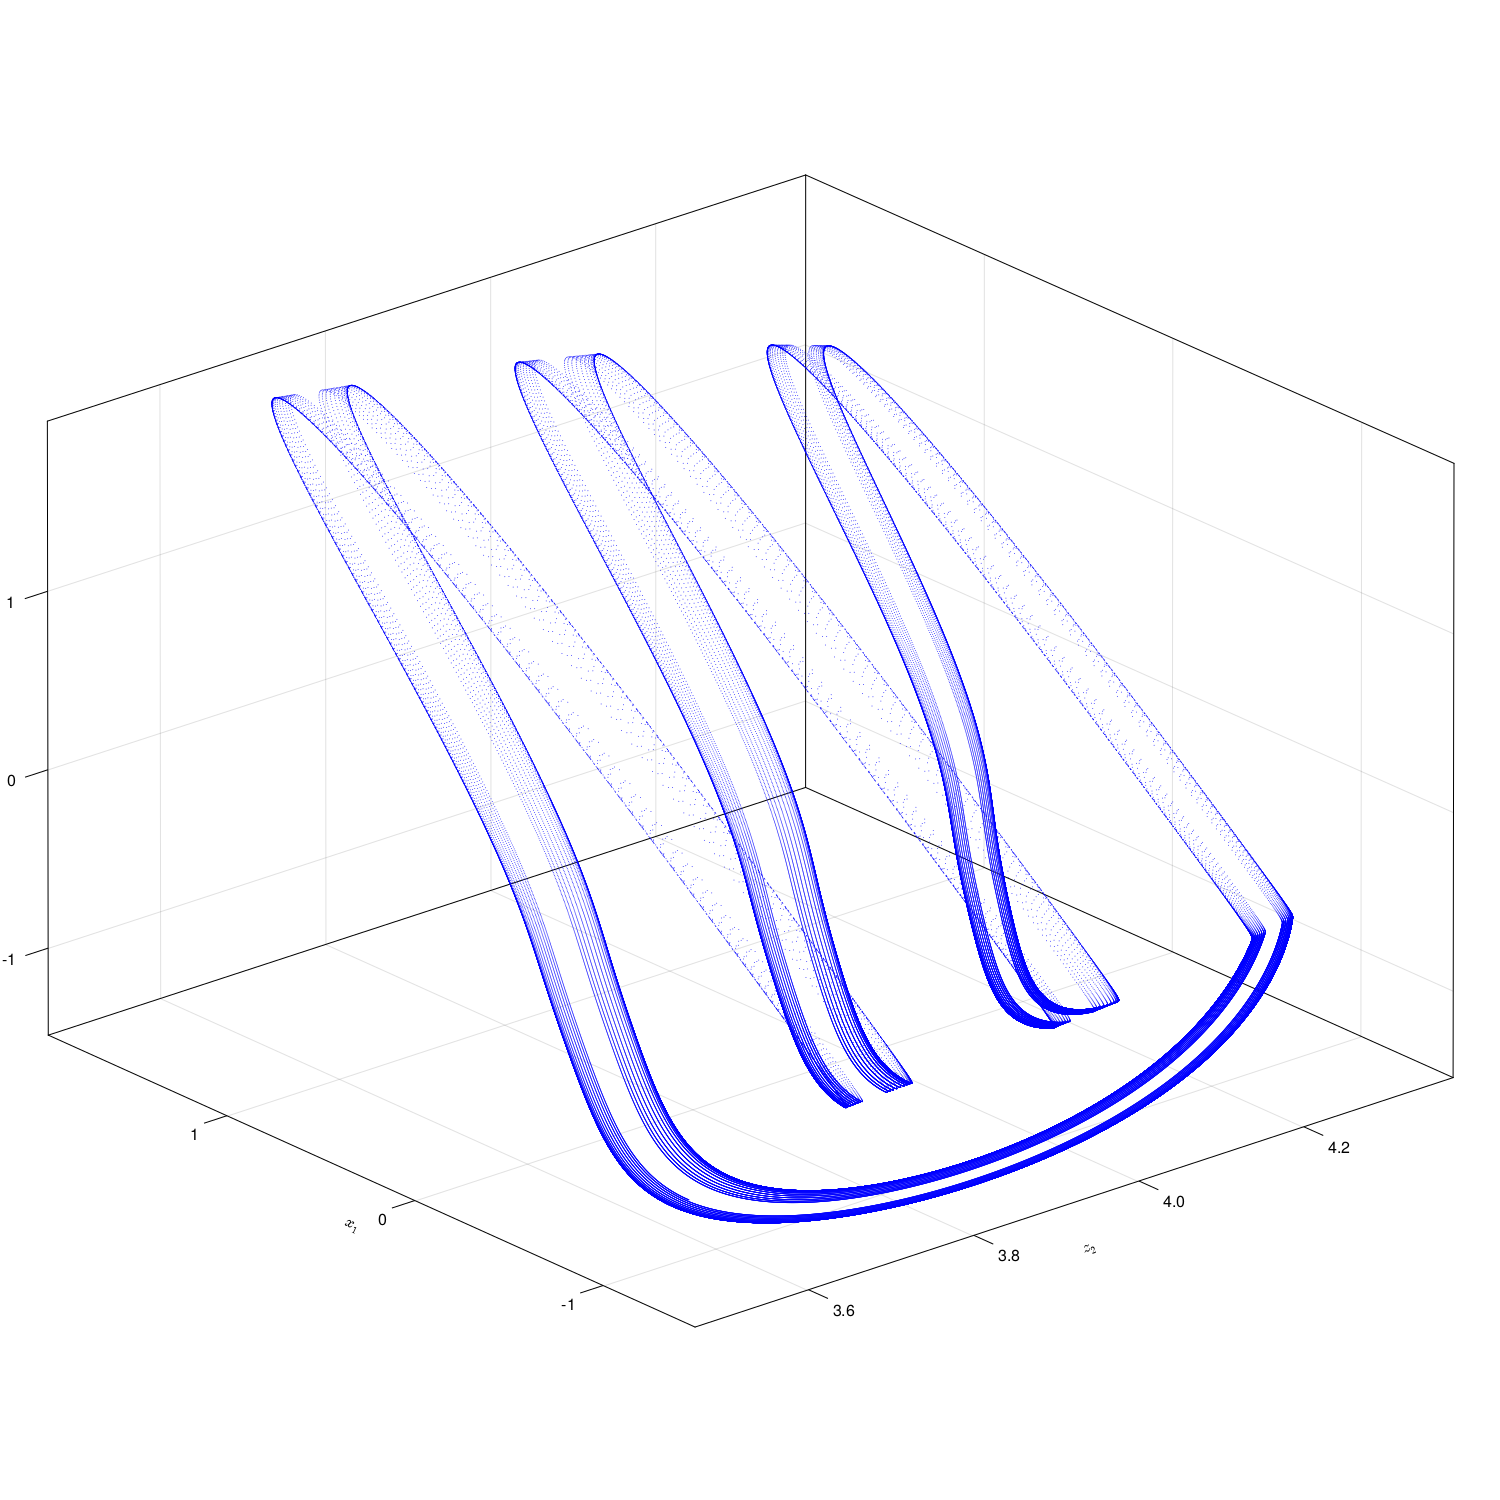

In [41]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"z_2", ylabel = L"x_1", zlabel = L"x_2")

scatter!(ax, data2[100000:550000, 6], data2[100000:550000, 1], data2[100000:550000, 4], markersize = 0.9, color = "blue")

fig

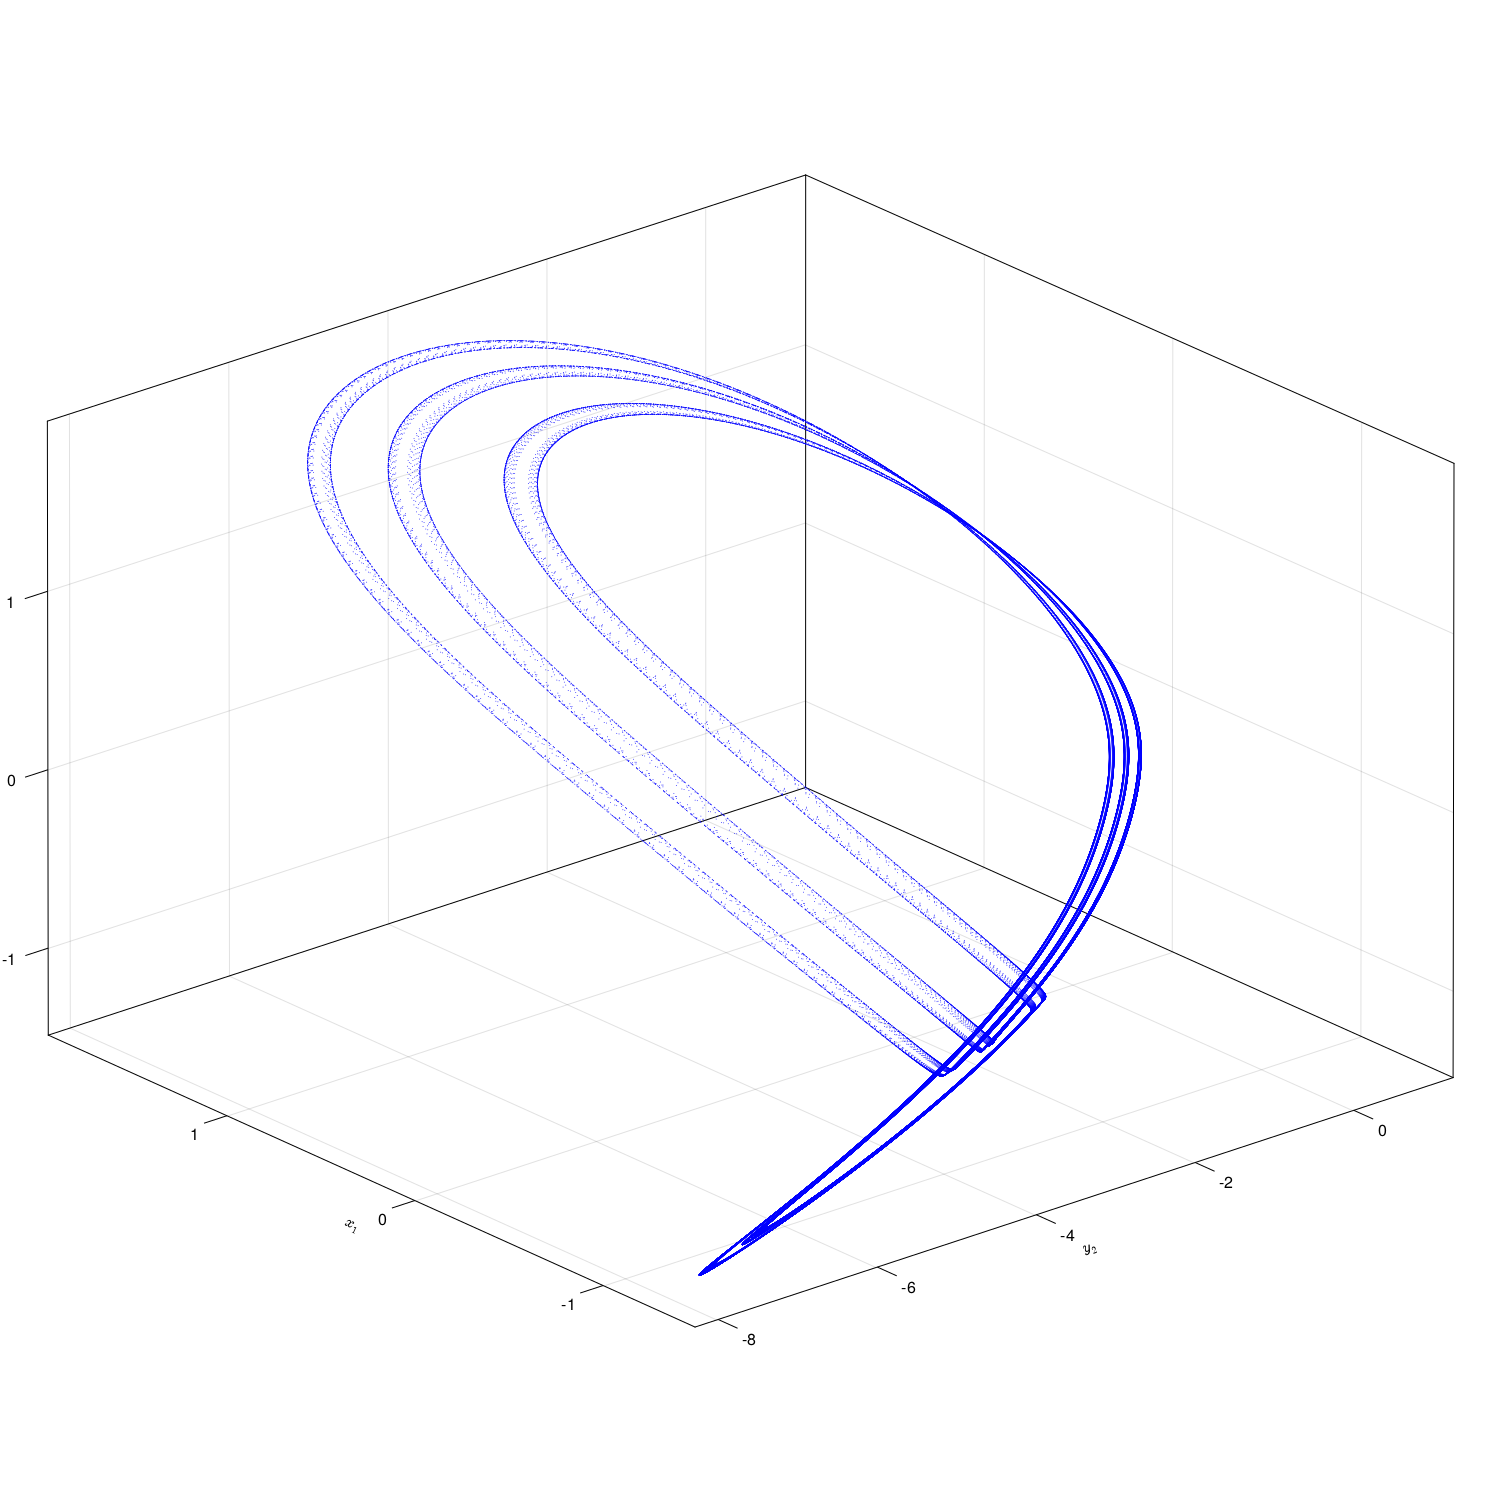

In [42]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"y_2", ylabel = L"x_1", zlabel = L"x_2")

scatter!(ax, data2[100000:550000, 5], data2[100000:550000, 1], data2[100000:550000, 4], markersize = 0.9, color = "blue")

fig

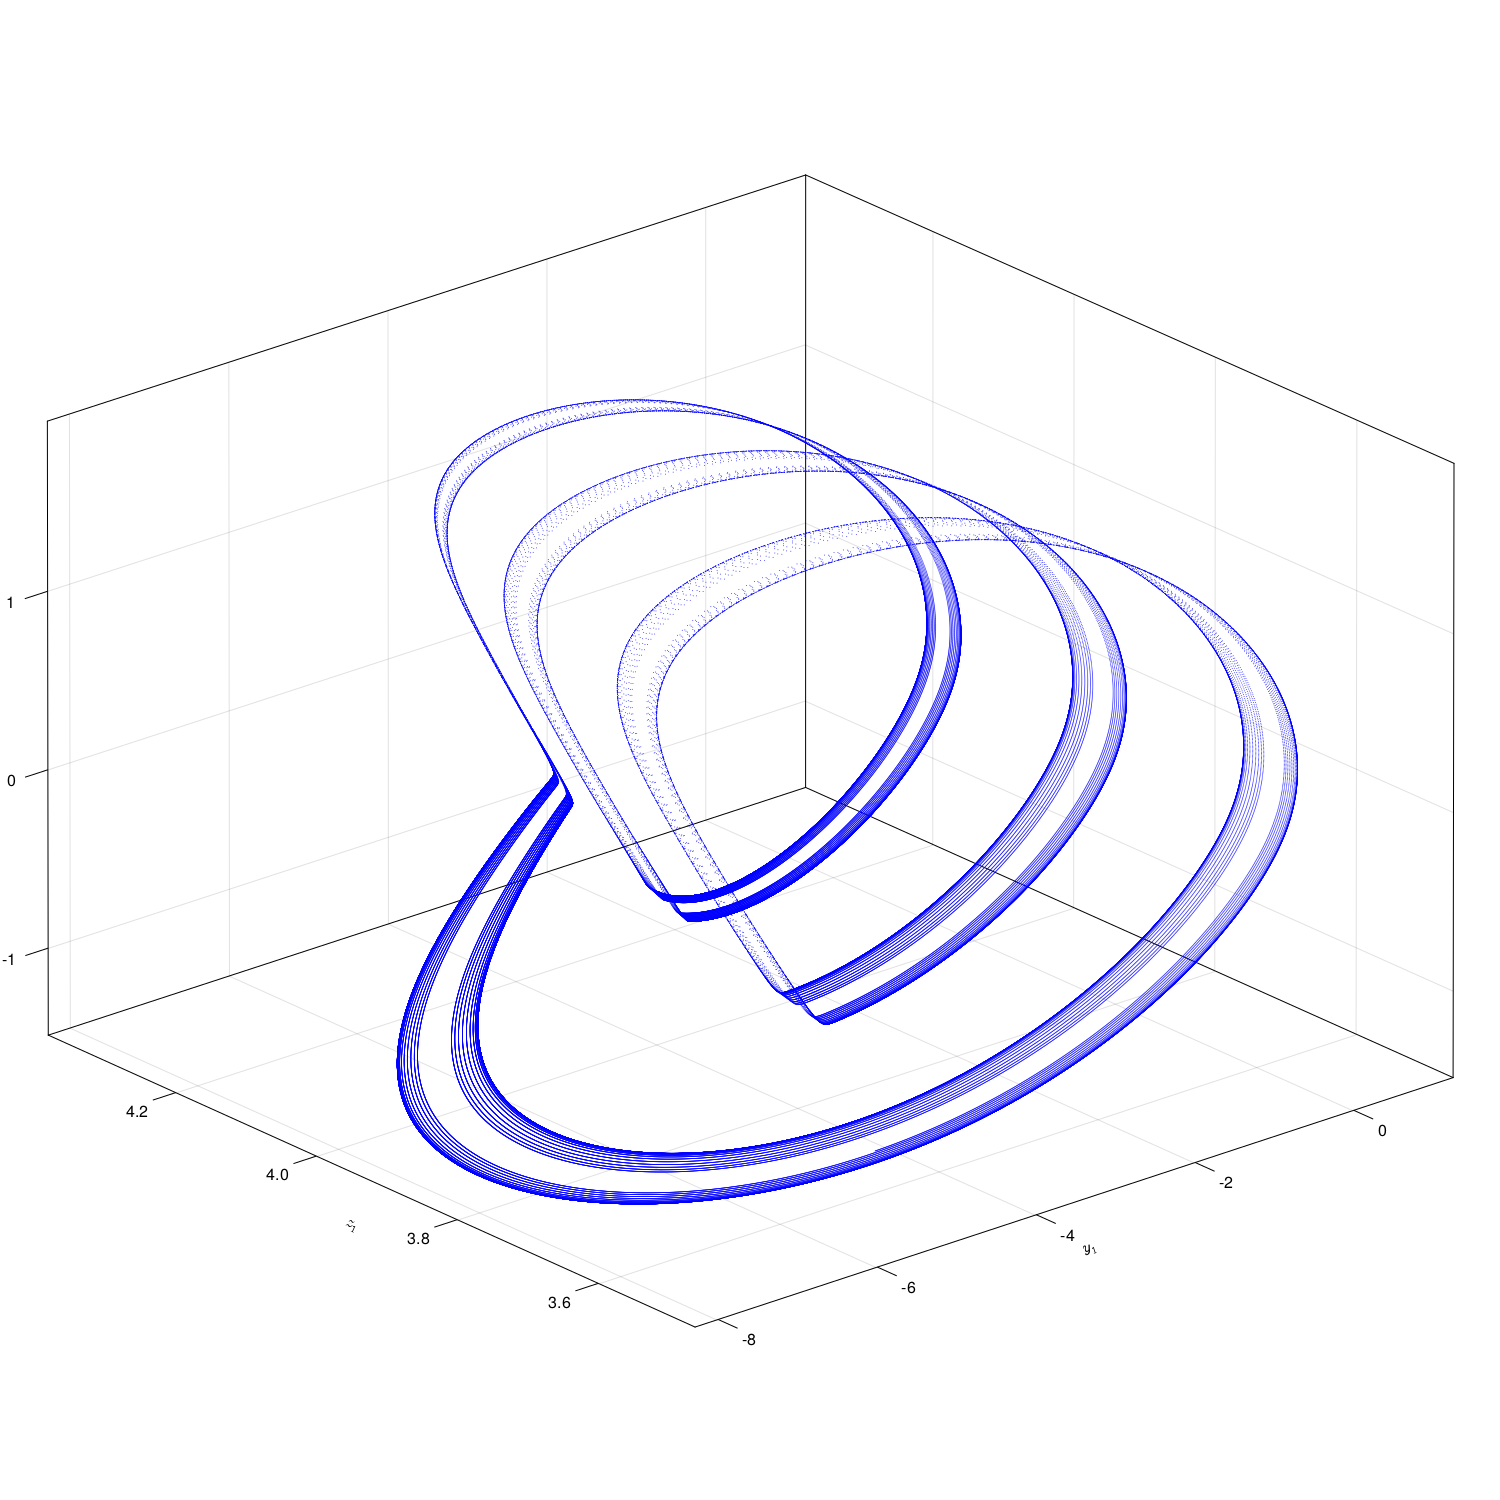

In [43]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"y_1", ylabel = L"z_1", zlabel = L"x_1")

scatter!(ax, data2[100000:550000, 2], data2[100000:550000, 3], data2[100000:550000, 1], markersize = 0.9, color = "blue")

fig

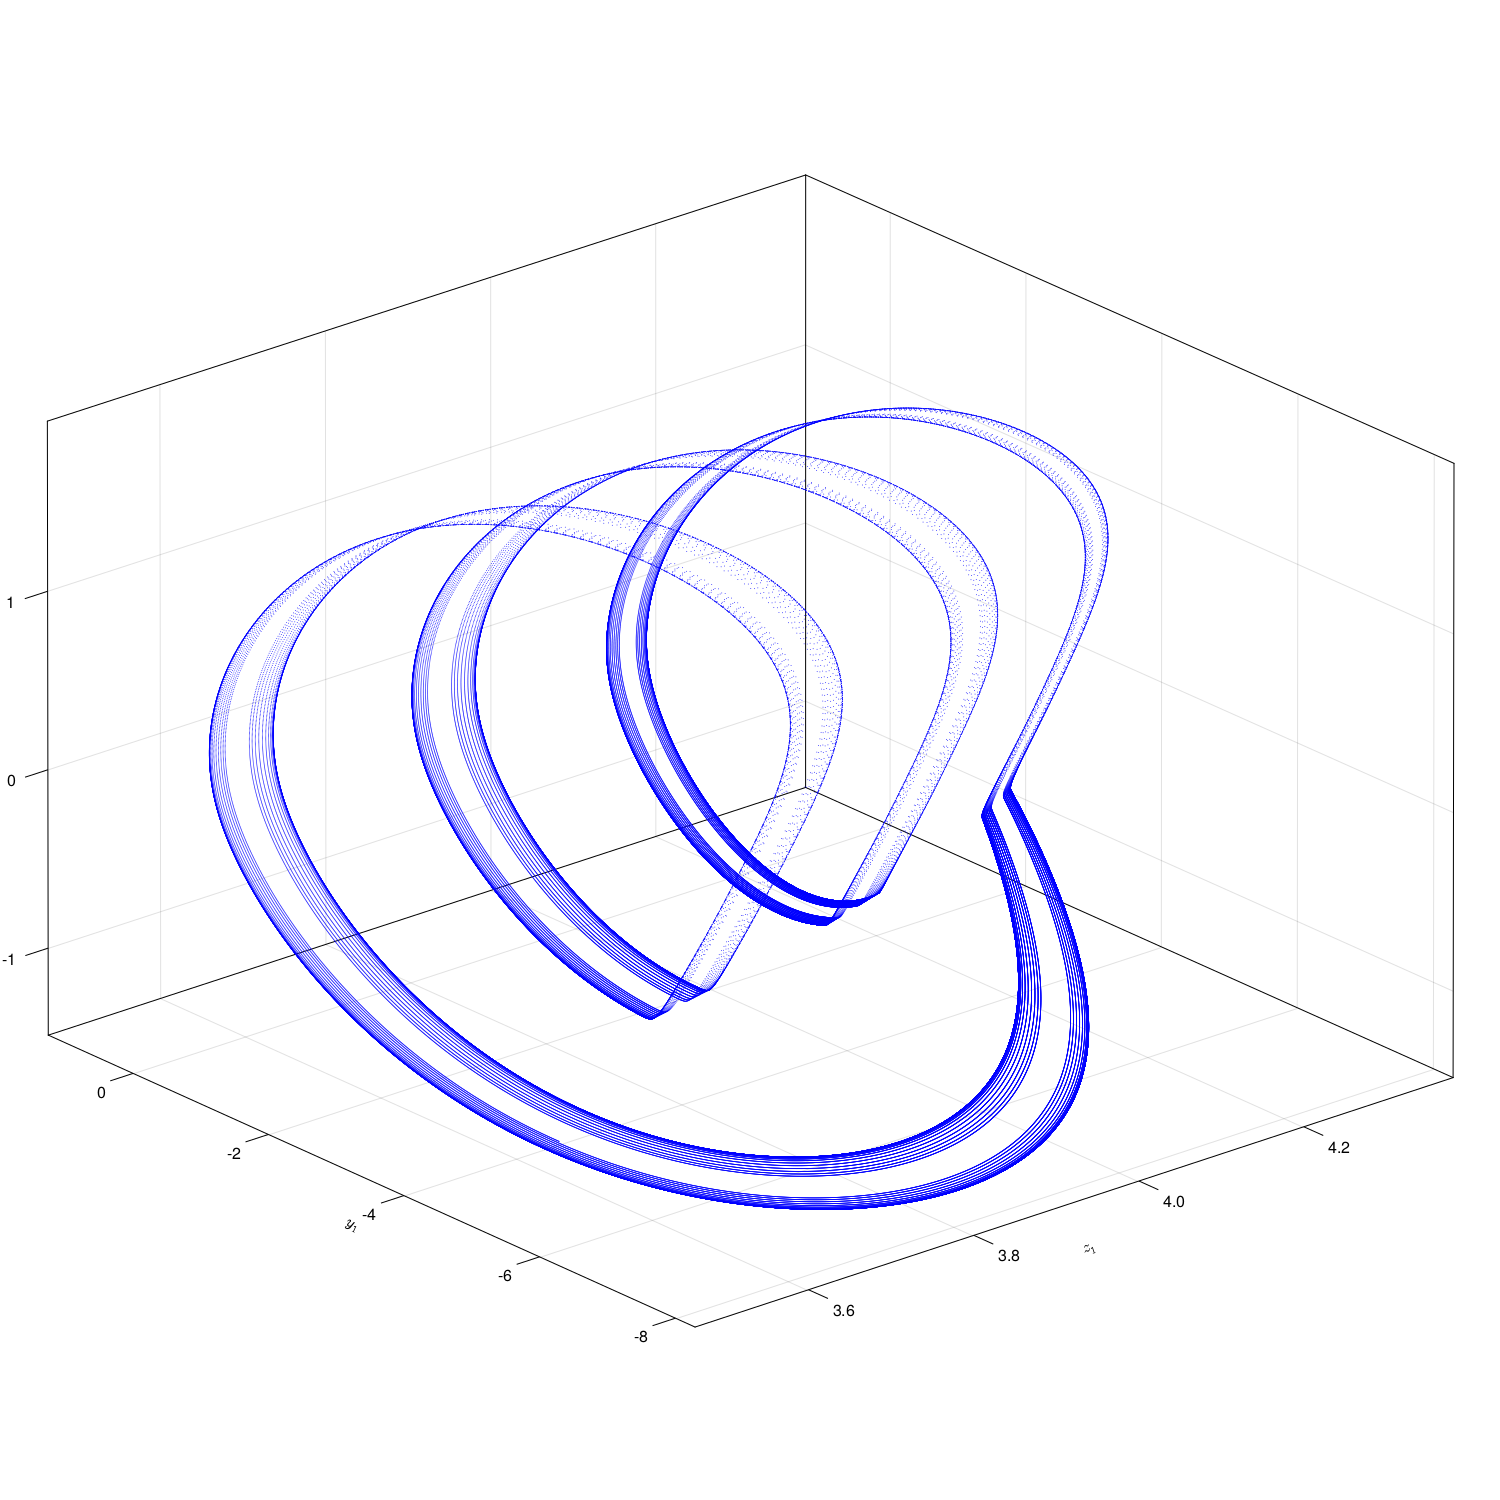

In [44]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"z_1", ylabel = L"y_1", zlabel = L"x_1")

scatter!(ax, data2[100000:550000, 3], data2[100000:550000, 2], data2[100000:550000, 1], markersize = 0.9, color = "blue")

fig

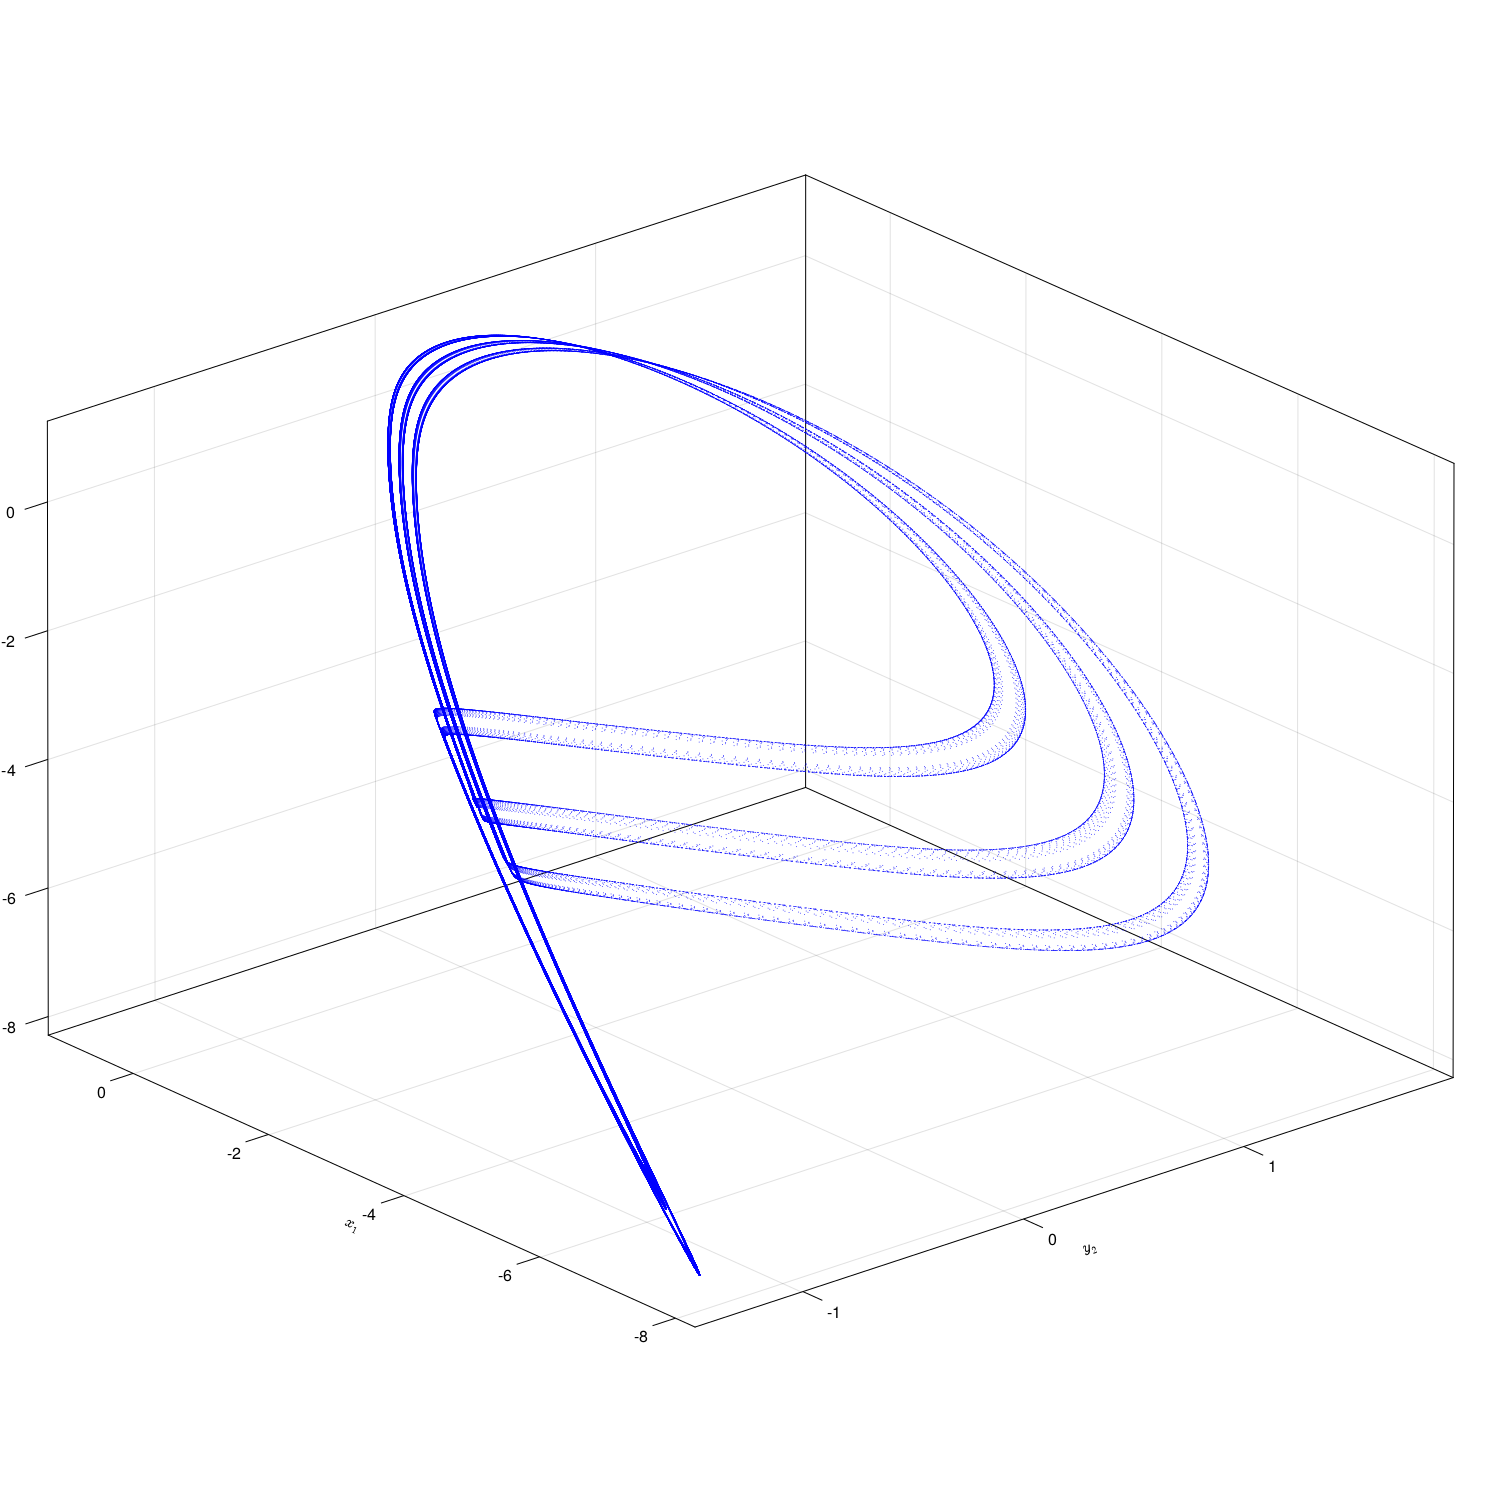

In [45]:
fig = Figure(resolution = (1500, 1500))
ax = Axis3(fig[1,1]; xlabel = L"y_2", ylabel = L"x_1", zlabel = L"y_1")

scatter!(ax, data2[100000:550000, 1], data2[100000:550000, 5], data2[100000:550000, 2], markersize = 0.9, color = "blue")

fig

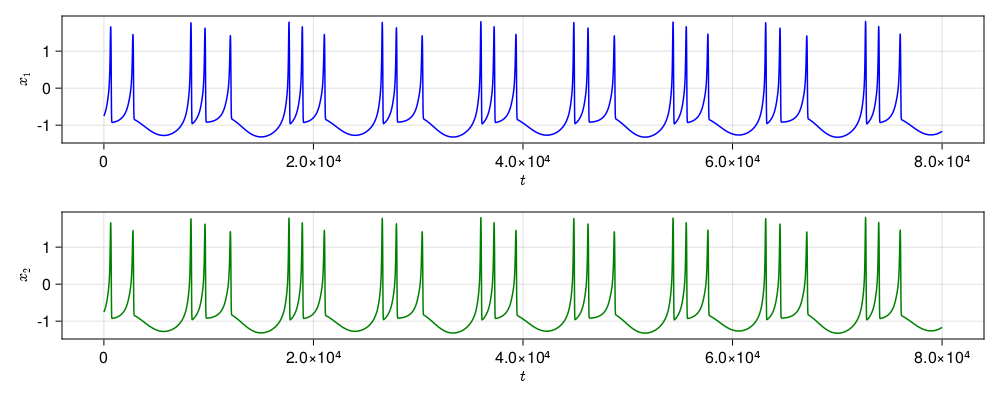

In [46]:
fig = Figure(resolution = (1000, 400))

ax1 = Axis(fig[1,1]; xlabel = L"t", ylabel = L"x_{1}")
ax2 = Axis(fig[2,1]; xlabel = L"t", ylabel = L"x_{2}")

lines!(ax1, data2[120000:200000, 1], lw = 0.5, color = "blue")
lines!(ax2, data2[120000:200000, 4], lw = 0.5, color = "green")

fig